# Initialization

In [4]:
# import
import numpy as np
import pandas as pd
import sys
import os
import json
import matplotlib.pyplot as plt

In [2]:
# Global variables to store the root path and the execution flag
root_path = None
root_path_set = False

In [3]:
def set_root_path():
    global root_path, root_path_set  # Declare the global variables
    if not root_path_set:
        # Your code here
        print("Setting Root Path")
        os.chdir('..')
        root_path = os.getcwd()
        # Set the flag to True after execution
        root_path_set = True
    else:
        print("Root Path has already been set.")
    
    return root_path

# Call the function
root_path = set_root_path()

Setting Root Path


# Static Visualization

In [32]:
df_halu = pd.read_json('dataset_out/Halucination/llama2-7b-chat.json')
df_halu['number_segs'] = None
df_halu['meta_label'] = None
for i in range(len(df_halu)):
    df_halu.loc[i, "number_segs"] = len(df_halu.loc[i, "segments"])
    if  'False' in df_halu.loc[i, 'label']:
        df_halu.loc[i, 'meta_label'] = 'False'
    else:
        df_halu.loc[i, 'meta_label'] = 'True'


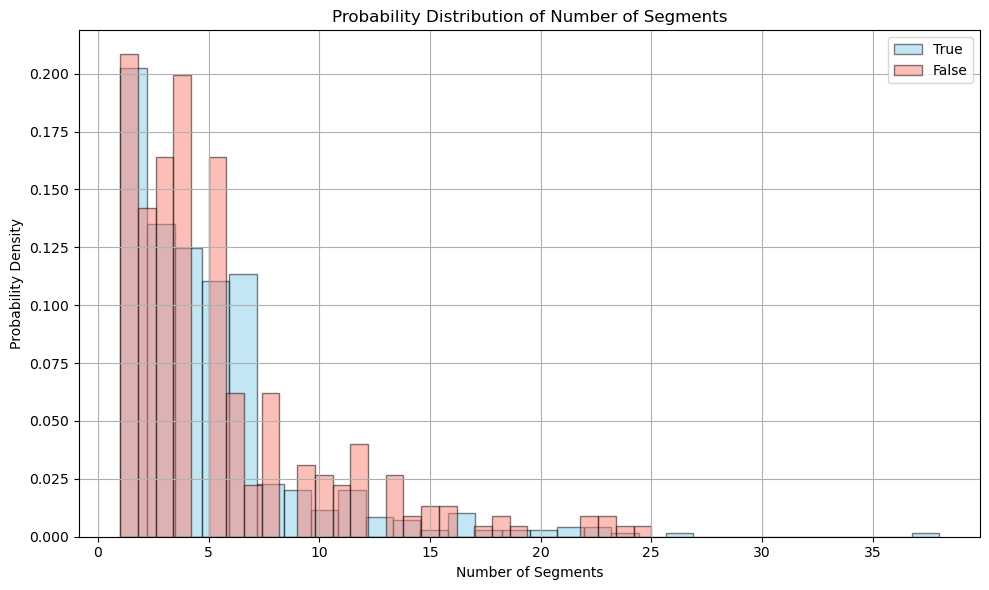

In [33]:
# Assuming df_halu is your DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the probability distribution for meta_label == True
plt.hist(df_halu.loc[df_halu['meta_label'] == 'True', 'number_segs'], bins=30, density=True, color='skyblue', alpha=0.5, edgecolor='black', label='True')

# Plot the probability distribution for meta_label == False
plt.hist(df_halu.loc[df_halu['meta_label'] == 'False', 'number_segs'], bins=30, density=True, color='salmon', alpha=0.5, edgecolor='black', label='False')

# Set the title and labels
plt.title('Probability Distribution of Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Probability Density')

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)  # Add grid lines
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

/home/tianyuchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/tianyuchen/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


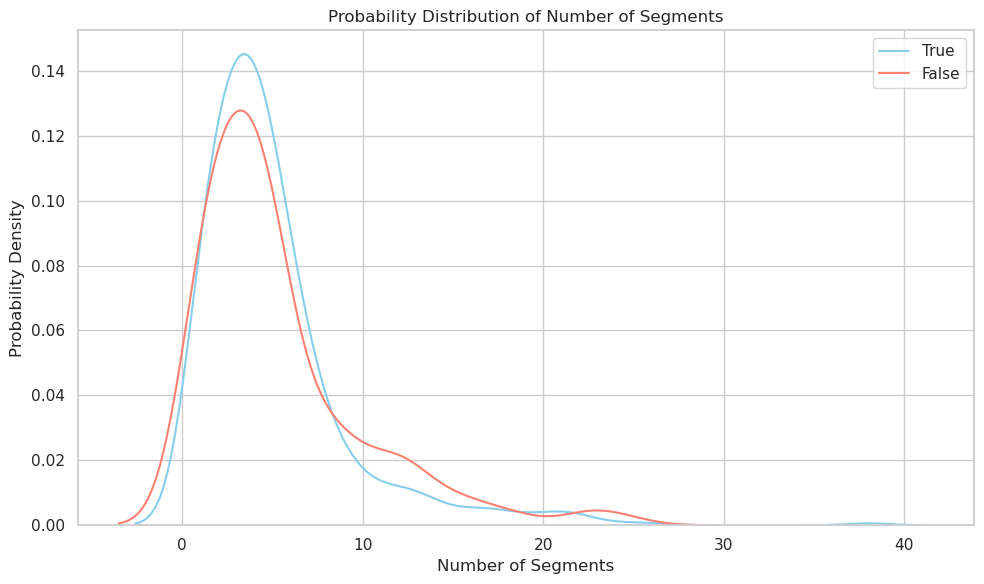

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style
sns.set(style="whitegrid")

# Assuming df_halu is your DataFrame
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot the probability distribution for meta_label == True
sns.kdeplot(data=df_halu.loc[df_halu['meta_label'] == 'True', 'number_segs'], color='skyblue', label='True', linestyle='-')

# Plot the probability distribution for meta_label == False
sns.kdeplot(data=df_halu.loc[df_halu['meta_label'] == 'False', 'number_segs'], color='salmon', label='False', linestyle='-')

# Set the title and labels
plt.title('Probability Distribution of Number of Segments')
plt.xlabel('Number of Segments')
plt.ylabel('Probability Density')

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [11]:
df_halu['label']

0                                                [False]
1                                                 [True]
2                                                [False]
3                                                [False]
4                                                [False]
                             ...                        
842    [True, True, False, True, False, True, True, T...
843    [True, True, True, False, False, True, False, ...
844    [True, False, True, False, True, True, True, T...
845    [False, False, False, False, False, False, Fal...
846    [True, False, False, True, True, True, False, ...
Name: label, Length: 847, dtype: object

In [10]:
df_halu['res']

0                                                 ['FP']
1                                                 ['TP']
2                                                 ['FP']
3                                                 ['FP']
4                                                 ['FP']
                             ...                        
842    ['TP', 'TP', 'FP', 'TP', 'FP', 'TP', 'TP', 'TP...
843    ['TP', 'TP', 'TP', 'FP', 'FP', 'TP', 'FP', 'TP...
844    ['TP', 'FP', 'TP', 'FP', 'TP', 'TP', 'TP', 'TP...
845    ['FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP', 'FP...
846    ['TP', 'FP', 'FP', 'TP', 'TP', 'TP', 'FP', 'TP...
Name: res, Length: 847, dtype: object

In [24]:
df_halu.head(5)

,id,dataset,qst,response,segments,label,res,number_segs,meta_label
0,0,math,Show me the answer for the following math ques...,"To find the product of 143287 and 534156, you ...","[To find the product of 143287 and 534156, you...",[False],['FP'],1,False
1,1,math,Give me the largest even prime.,The largest even prime number is 2.,[The largest even prime number is 2.],[True],['TP'],1,True
2,2,math,"In triaiangle ABC, angie ABC is 89 degrees. Ca...","No, a triangle with an angle of 89 degrees can...","[No, a triangle with an angle of 89 degrees ca...",[False],['FP'],1,False
3,3,math,4839+3948-45,The answer is 8739.,[The answer is 8739.],[False],['FP'],1,False
4,4,math,Tell me the answer to 2+4*3-7=?,The answer to 2+4*3-7 is 5.,[The answer to 2+4*3-7 is 5.],[False],['FP'],1,False
